## House Rent Analysis and Prediction of Mumbai

### 1.Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Dataset
Main Source: https://www.kaggle.com/datasets/lokeshgupta2020/house-rent-in-mumbai

In [85]:
df= pd.read_csv("house_rent_mumbai.csv")
df.shape

(1000, 16)

In [86]:
df.head()

,Unnamed: 0,seller_name,seller_type,size,type_,type_of_house,name,location,city,price,area,area_type,status,deposit,no_bathroom,facing
0,0,Kasturi Developers,BUILDER,2,BHK,Apartment,Shagun White Woods,Ulwe,Mumbai,"17,000",1180,Area in sq ft,Unfurnished,No Deposit,2 bathrooms,NorthEast facing
1,1,Kasturi Developers,BUILDER,3,BHK,Apartment,Surana Tulsi Gaurav,Ulwe,Mumbai,"22,000",1720,Area in sq ft,Unfurnished,No Deposit,3 bathrooms,NorthEast facing
2,2,Kasturi Developers,BUILDER,2,BHK,Apartment,Tricity Enclave,Ulwe,Mumbai,"12,500",1150,Area in sq ft,Unfurnished,No Deposit,2 bathrooms,NorthEast facing
3,3,seller,VERIFIED OWNER,2,BHK,Apartment,Godrej Prime,Chembur,Mumbai,"55,000",1050,Area in sq ft,Semi-Furnished,No Deposit,2 bathrooms,NaN
4,4,seller,VERIFIED OWNER,2,BHK,Apartment,Tanvi Eminence Phase 2,Mira Road East,Mumbai,"18,500",1165,Area in sq ft,Semi-Furnished,No Deposit,2 bathrooms,East facing


In [87]:
df.tail()

,Unnamed: 0,seller_name,seller_type,size,type_,type_of_house,name,location,city,price,area,area_type,status,deposit,no_bathroom,facing
995,995,Sanjay,AGENT,2,BHK,Apartment,Ajmera New Era Yogidham Phase IV Tower C,Kalyan West,Mumbai,"15,000",650,Area in sq ft,Furnished,No Deposit,2 bathrooms,West facing
996,996,Prime property,AGENT,1,BHK,Apartment,Haware Haware Citi,Thane West,Mumbai,"11,000",625,Area in sq ft,Unfurnished,No Deposit,2 bathrooms,East facing
997,997,Sanjay,AGENT,1,BHK,Apartment,NaN,Kalyan West,Mumbai,"9,000",650,Area in sq ft,Unfurnished,No Deposit,1 bathrooms,West facing
998,998,Prime property,AGENT,1,BHK,Apartment,Raunak Heights,Thane West,Mumbai,"12,990",600,Area in sq ft,Semi-Furnished,No Deposit,2 bathrooms,North facing
999,999,Prime property,AGENT,2,BHK,Apartment,Puraniks Tokyo Bay Phase 2A,Thane West,Mumbai,"20,000",1050,Area in sq ft,Semi-Furnished,No Deposit,2 bathrooms,North facing


In [88]:
# We can see Column 'Unnamed: 0' is not necessary so we can drop it
df.drop('Unnamed: 0', axis=1, inplace=True)

### 3. Exploratory Data Analysis

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_name    1000 non-null   object
 1   seller_type    1000 non-null   object
 2   size           1000 non-null   int64 
 3   type_          1000 non-null   object
 4   type_of_house  1000 non-null   object
 5   name           777 non-null    object
 6   location       1000 non-null   object
 7   city           1000 non-null   object
 8   price          1000 non-null   object
 9   area           1000 non-null   int64 
 10  area_type      1000 non-null   object
 11  status         1000 non-null   object
 12  deposit        1000 non-null   object
 13  no_bathroom    999 non-null    object
 14  facing         853 non-null    object
dtypes: int64(2), object(13)
memory usage: 117.3+ KB


In [90]:
# We have only 2 numerical features- size,area
# 13 Categorical features-   seller_name,seller_type ,type_ ,type_of_house,
#                       name,location, city ,price ,area_type,status,deposit,
#                       no_bathroom,facing
# Target Feature ========>>> price >>>

In [91]:
# lets convert our target feature 'price' from object to integer
df['price']=df['price'].str.replace(',','')
df['price']=pd.to_numeric(df['price'], errors='coerce')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_name    1000 non-null   object 
 1   seller_type    1000 non-null   object 
 2   size           1000 non-null   int64  
 3   type_          1000 non-null   object 
 4   type_of_house  1000 non-null   object 
 5   name           777 non-null    object 
 6   location       1000 non-null   object 
 7   city           1000 non-null   object 
 8   price          887 non-null    float64
 9   area           1000 non-null   int64  
 10  area_type      1000 non-null   object 
 11  status         1000 non-null   object 
 12  deposit        1000 non-null   object 
 13  no_bathroom    999 non-null    object 
 14  facing         853 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 117.3+ KB


In [93]:
df.describe()
# we can observe that the price of 75% and max have huge differnce 

,size,price,area
count,1000.000000,887.000000,1000.000000
mean,1.962000,31185.740699,1025.603000
std,0.815611,21686.584537,554.974035
min,1.000000,3000.000000,200.000000
25%,1.000000,14500.000000,650.000000
50%,2.000000,24000.000000,950.000000
75%,2.000000,42500.000000,1200.000000
max,5.000000,98000.000000,7000.000000


C:\Users\ANIKET RAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


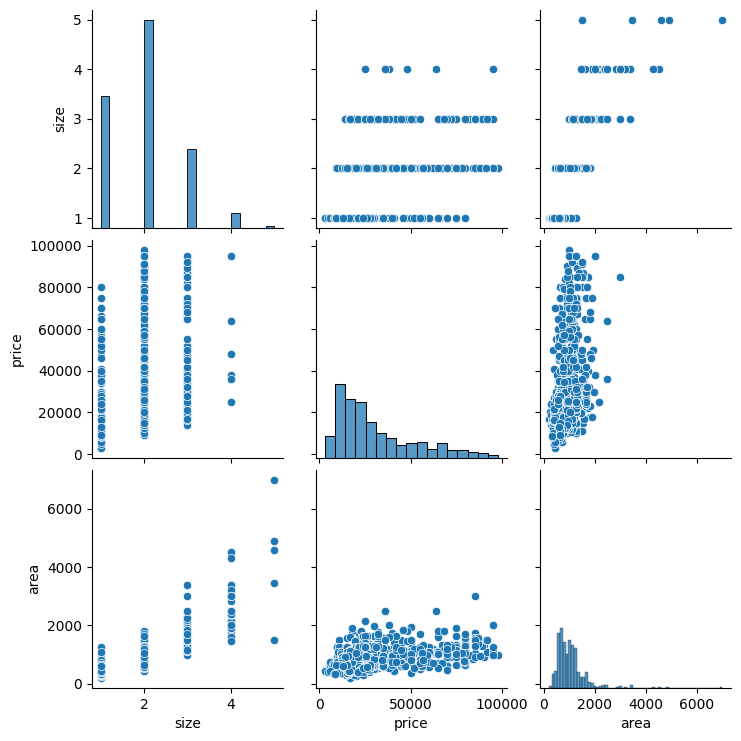

In [94]:
sns.pairplot(df)

In [95]:
# we can observe that the all the three size,area and price have 
# nearly linear correlation.

In [96]:
# value count for each feature

def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("------------------------------------")

In [97]:
value_count(df)

seller_name
Azuroin                             93
G K GROUP                           78
Prime property                      49
seller                              43
PropertyPistol Realty Pvt Ltd       38
                                    ..
RAS PROPERTIES                       1
Investor Floor                       1
Liban Empire                         1
Verma Real Estate                    1
Shri Sidhanath Estate Consultant     1
Name: count, Length: 90, dtype: int64
------------------------------------
seller_type
AGENT             954
VERIFIED OWNER     43
BUILDER             3
Name: count, dtype: int64
------------------------------------
size
2    476
1    303
3    182
4     34
5      5
Name: count, dtype: int64
------------------------------------
type_
BHK    967
RK      33
Name: count, dtype: int64
------------------------------------
type_of_house
Apartment            966
Studio Apartment      33
Independent House      1
Name: count, dtype: int64
------------------------

In [98]:
# unique categories in each feature
def unique(df):
    for i in df.columns:
        print(df[i].unique())
        print("---------------------------------")

In [99]:
unique(df)

['Kasturi Developers' 'seller' 'Neha' 'EstatesHUB'
 'Earth Property Consultant' 'First home' 'Rutu Real estate'
 'Aditya Properties' 'Blue Diamond Realtors' 'RAS PROPERTIES'
 'Hitech Realty Consultancy' 'Kuber property' 'Cordeiro Real Estate'
 'sahdev chaudhari' 'Rahul yadav' 'Kushvin Properties'
 'MANASVI PROPERTIES' 'Azuroin' 'VibrantKey' 'ADITYA PROPERTY'
 'Aashiyana property consultant' 'Mhaskar real estate consultancy'
 'Satyam Enterprises' 'Shree Homes Enterprises' 'Om Sai Siddhi Properties'
 'Bajrangi Realtors' 'Khalsa Propera' 'Om sai estate' 'Krishna Estate'
 'Shri Sidhanath Estate Consultant' 'PropertyPistol Realty Pvt Ltd'
 'Noronha Estate Agency' 'Royal Real Estate Agency' 'Swastik Reality'
 'Aadhar enterprises' 'Trishul property' 'Takshak Properties'
 'Shetty?s Realty' 'My Vastu Realtors' 'Horizon Real Estate'
 'Perfect Housing Dwell' 'Omkar Patil' 'Jyoti Enterprise' 'KD Real Estate'
 'Samadhan Real Estate Consultant' 'Laabh Properties' 'PREMIUM PROPERTIES'
 'Reliance Esta

<Axes: >

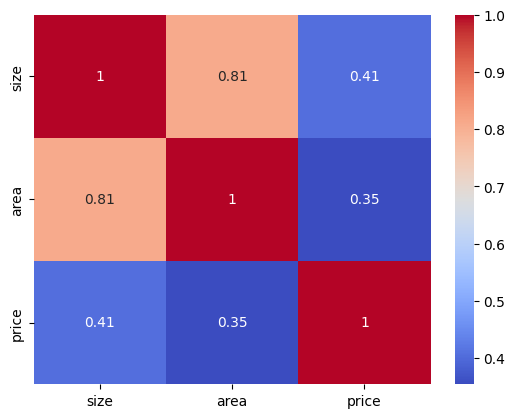

In [100]:
 # correlation heatmap
num_vars=["size",'area','price']
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

In [101]:
# we can see that correlation of size is greater than a area with price

### 4. Prepare data for Machine Learning Model

#### Data Cleaning

In [102]:
df.isnull().sum()  # find the number of missing values available in each feature

seller_name        0
seller_type        0
size               0
type_              0
type_of_house      0
name             223
location           0
city               0
price            113
area               0
area_type          0
status             0
deposit            0
no_bathroom        1
facing           147
dtype: int64

In [117]:
df.isnull().mean()*100 # % of missing values

# no_bathroom has 0.1% missing values
# Price has 11.3% missing values
# facing has 14.7% missing values
# name has 22.3% missing values


seller_name       0.0
seller_type       0.0
size              0.0
type_             0.0
type_of_house     0.0
name             22.3
location          0.0
city              0.0
price            11.3
area              0.0
area_type         0.0
status            0.0
deposit           0.0
no_bathroom       0.1
facing           14.7
dtype: float64

<Axes: >

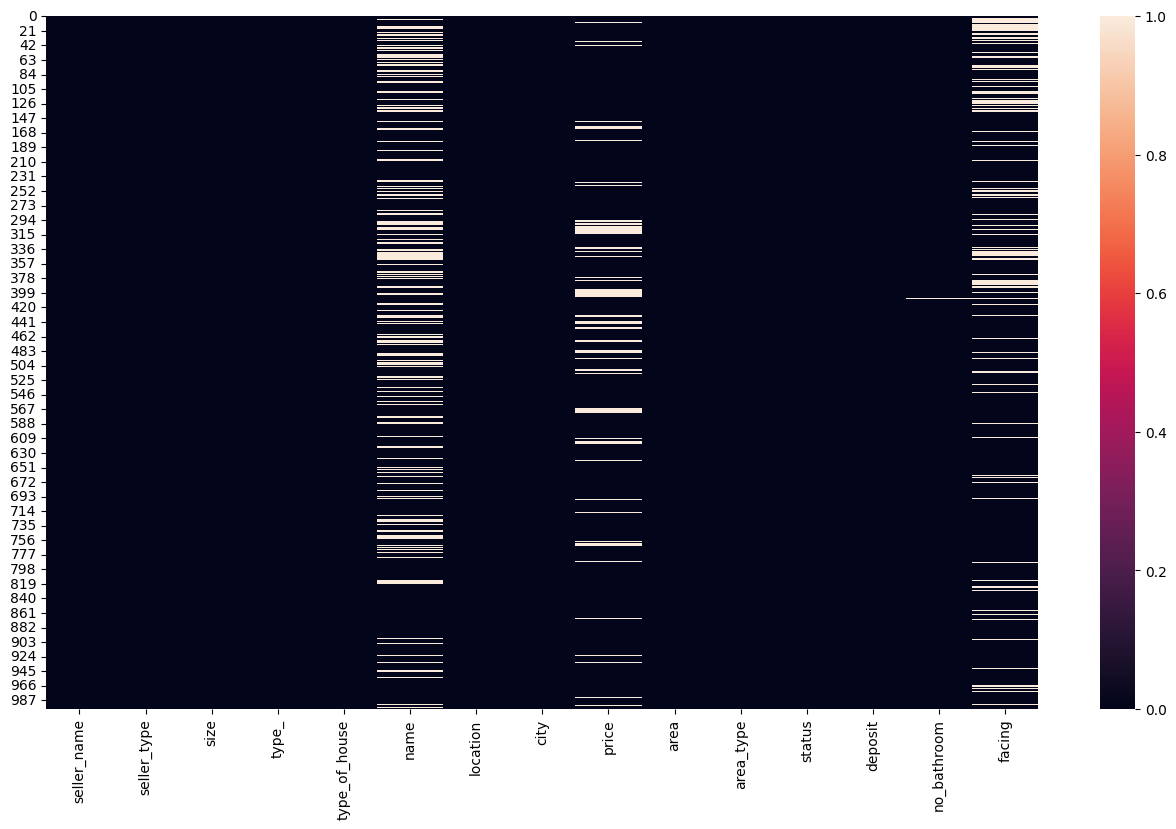

In [118]:
# visualize the missing values using heatmap to get the idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

# in name and facing randomly missing values are present (need to drop)

In [129]:
# Drop ------> name feature and facing feature
df2=df.drop(['name','facing'], axis=1)
df2.shape

(1000, 13)

In [130]:
df2

,seller_name,seller_type,size,type_,type_of_house,location,city,price,area,area_type,status,deposit,no_bathroom
0,Kasturi Developers,BUILDER,2,BHK,Apartment,Ulwe,Mumbai,17000.0,1180,Area in sq ft,Unfurnished,No Deposit,2 bathrooms
1,Kasturi Developers,BUILDER,3,BHK,Apartment,Ulwe,Mumbai,22000.0,1720,Area in sq ft,Unfurnished,No Deposit,3 bathrooms
2,Kasturi Developers,BUILDER,2,BHK,Apartment,Ulwe,Mumbai,12500.0,1150,Area in sq ft,Unfurnished,No Deposit,2 bathrooms
3,seller,VERIFIED OWNER,2,BHK,Apartment,Chembur,Mumbai,55000.0,1050,Area in sq ft,Semi-Furnished,No Deposit,2 bathrooms
4,seller,VERIFIED OWNER,2,BHK,Apartment,Mira Road East,Mumbai,18500.0,1165,Area in sq ft,Semi-Furnished,No Deposit,2 bathrooms
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sanjay,AGENT,2,BHK,Apartment,Kalyan West,Mumbai,15000.0,650,Area in sq ft,Furnished,No Deposit,2 bathrooms
996,Prime property,AGENT,1,BHK,Apartment,Thane West,Mumbai,11000.0,625,Area in sq ft,Unfurnished,No Deposit,2 bathrooms
997,Sanjay,AGENT,1,BHK,Apartment,Kalyan West,Mumbai,9000.0,650,Area in sq ft,Unfurnished,No Deposit,1 bathrooms
998,Prime property,AGENT,1,BHK,Apartment,Thane West,Mumbai,12990.0,600,Area in sq ft,Semi-Furnished,No Deposit,2 bathrooms


In [131]:
# fill mean value in ------> no_bathroom feature
# before that we need to convert 'no_bathroom' in integer form
df2['no_bathroom']=df2['no_bathroom'].str.replace('bathrooms','')

df2['no_bathroom']=pd.to_numeric(df2['no_bathroom'],errors='coerce')

df2['no_bathroom']=df2['no_bathroom'].fillna(df2['no_bathroom'].mean())
df2.isnull().sum()

seller_name        0
seller_type        0
size               0
type_              0
type_of_house      0
location           0
city               0
price            113
area               0
area_type          0
status             0
deposit            0
no_bathroom        0
dtype: int64

In [132]:
# to deal with price feature null values let first get the rows with null_price_values
null_price_rows = df2[df2['price'].isnull()]
null_price_rows


,seller_name,seller_type,size,type_,type_of_house,location,city,price,area,area_type,status,deposit,no_bathroom
9,seller,VERIFIED OWNER,3,BHK,Apartment,Fort,Mumbai,NaN,1450,Area in sq ft,Furnished,No Deposit,3.0
36,Cordeiro Real Estate,AGENT,4,BHK,Apartment,Wadala,Mumbai,NaN,2346,Area in sq ft,Unfurnished,No Deposit,4.0
42,VibrantKey,AGENT,5,BHK,Apartment,Malabar Hill,Mumbai,NaN,3450,Area in sq ft,Furnished,No Deposit,5.0
57,Swastik Reality,AGENT,5,BHK,Apartment,Lower Parel,Mumbai,NaN,7000,Area in sq ft,Semi-Furnished,No Deposit,5.0
73,Urban Investment Property Solutions,AGENT,3,BHK,Apartment,Bandra West,Mumbai,NaN,1600,Area in sq ft,Furnished,No Deposit,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,DHARTI ESTATE CONSULTANT,AGENT,3,BHK,Apartment,Santacruz East,Mumbai,NaN,2500,Area in sq ft,Furnished,No Deposit,3.0
932,Tejasvi Realty Pvt Ltd,AGENT,4,BHK,Apartment,Juhu,Mumbai,NaN,2400,Area in sq ft,Furnished,No Deposit,4.0
933,Tejasvi Realty Pvt Ltd,AGENT,3,BHK,Apartment,Juhu,Mumbai,NaN,1400,Area in sq ft,Semi-Furnished,No Deposit,3.0
983,DHARTI ESTATE CONSULTANT,AGENT,2,BHK,Apartment,Santacruz East,Mumbai,NaN,1200,Area in sq ft,Furnished,No Deposit,3.0


In [133]:
# Group by 'size' and fill null values in 'price' with the mean of each group
df2['price'] = df2['price'].fillna(df2.groupby('size')['price'].transform('mean'))

In [134]:
df2.isnull().sum()
# we still have null values in price feature

seller_name      0
seller_type      0
size             0
type_            0
type_of_house    0
location         0
city             0
price            5
area             0
area_type        0
status           0
deposit          0
no_bathroom      0
dtype: int64

In [135]:
null_price_rows = df2[df2['price'].isnull()]
null_price_rows
# we can observe that there is no data inreference to the size of 5 BHK so we can take it in prediction

,seller_name,seller_type,size,type_,type_of_house,location,city,price,area,area_type,status,deposit,no_bathroom
42,VibrantKey,AGENT,5,BHK,Apartment,Malabar Hill,Mumbai,NaN,3450,Area in sq ft,Furnished,No Deposit,5.0
57,Swastik Reality,AGENT,5,BHK,Apartment,Lower Parel,Mumbai,NaN,7000,Area in sq ft,Semi-Furnished,No Deposit,5.0
334,Trishul property,AGENT,5,BHK,Apartment,Santacruz East,Mumbai,NaN,1500,Area in sq ft,Semi-Furnished,No Deposit,4.0
403,Swastik Reality,AGENT,5,BHK,Apartment,Worli,Mumbai,NaN,4900,Area in sq ft,Semi-Furnished,No Deposit,5.0
994,Rightside Properties,AGENT,5,BHK,Apartment,Powai,Mumbai,NaN,4580,Area in sq ft,Semi-Furnished,No Deposit,4.0


In [136]:
# drop na value of rows with size ==5
df3=df2.dropna()
df3.shape

(995, 13)

In [137]:
df3.isnull().sum()
# we can observe that now our data has no missing values

seller_name      0
seller_type      0
size             0
type_            0
type_of_house    0
location         0
city             0
price            0
area             0
area_type        0
status           0
deposit          0
no_bathroom      0
dtype: int64

In [138]:
df3.head()

,seller_name,seller_type,size,type_,type_of_house,location,city,price,area,area_type,status,deposit,no_bathroom
0,Kasturi Developers,BUILDER,2,BHK,Apartment,Ulwe,Mumbai,17000.0,1180,Area in sq ft,Unfurnished,No Deposit,2.0
1,Kasturi Developers,BUILDER,3,BHK,Apartment,Ulwe,Mumbai,22000.0,1720,Area in sq ft,Unfurnished,No Deposit,3.0
2,Kasturi Developers,BUILDER,2,BHK,Apartment,Ulwe,Mumbai,12500.0,1150,Area in sq ft,Unfurnished,No Deposit,2.0
3,seller,VERIFIED OWNER,2,BHK,Apartment,Chembur,Mumbai,55000.0,1050,Area in sq ft,Semi-Furnished,No Deposit,2.0
4,seller,VERIFIED OWNER,2,BHK,Apartment,Mira Road East,Mumbai,18500.0,1165,Area in sq ft,Semi-Furnished,No Deposit,2.0


### Feature Selection

In [139]:
df3.columns
# we can see that we have few features that are not necessary required in prediction

Index(['seller_name', 'seller_type', 'size', 'type_', 'type_of_house',
       'location', 'city', 'price', 'area', 'area_type', 'status', 'deposit',
       'no_bathroom'],
      dtype='object')

In [140]:
# features like 'seller_name', 'type_','area_type','deposit' are not required
# dropping features that are not required

df4= df3.drop(['seller_name', 'type_','area_type','deposit'],axis=1)
df4.head()


,seller_type,size,type_of_house,location,city,price,area,status,no_bathroom
0,BUILDER,2,Apartment,Ulwe,Mumbai,17000.0,1180,Unfurnished,2.0
1,BUILDER,3,Apartment,Ulwe,Mumbai,22000.0,1720,Unfurnished,3.0
2,BUILDER,2,Apartment,Ulwe,Mumbai,12500.0,1150,Unfurnished,2.0
3,VERIFIED OWNER,2,Apartment,Chembur,Mumbai,55000.0,1050,Semi-Furnished,2.0
4,VERIFIED OWNER,2,Apartment,Mira Road East,Mumbai,18500.0,1165,Semi-Furnished,2.0


### Finding Outlier and Removing

In [141]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots

import scipy.stats as stats

def diagnostic_plots(df,variable):
    # function takes dataframe df and
    # the variable of interest as arguments
    
    # define figure size
    
    plt.figure(figsize=(16,4))
    
    # histogram
    
    plt.subplot(1,3,1)
    sns.displot(df[variable],bins=30)
    plt.title('Histogram')
    
    # Q-Q plot
    
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist='norm',plot=plt)
    plt.ylabel('Variable quantiles')
    
    # boxplot
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    
    plt.show()
    
    
    

******* size *******


C:\Users\ANIKET RAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ANIKET RAY\AppData\Local\Temp\ipykernel_21500\1989572192.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


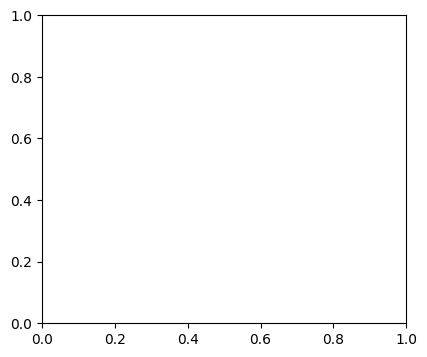

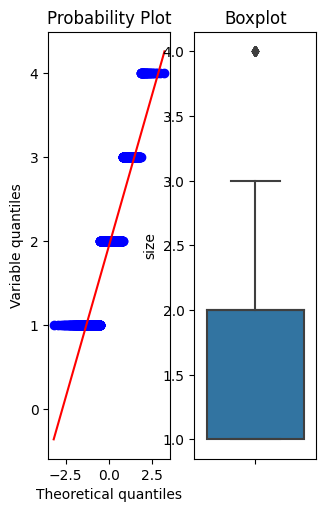

******* area *******


C:\Users\ANIKET RAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ANIKET RAY\AppData\Local\Temp\ipykernel_21500\1989572192.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


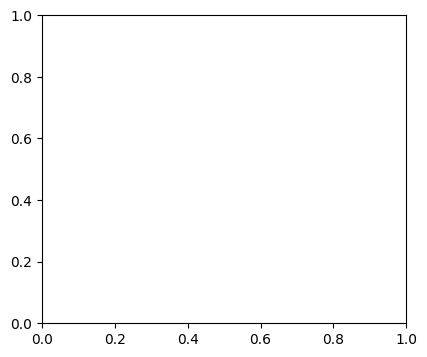

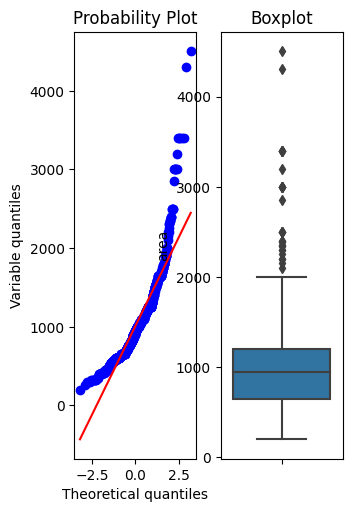

******* no_bathroom *******


C:\Users\ANIKET RAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ANIKET RAY\AppData\Local\Temp\ipykernel_21500\1989572192.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


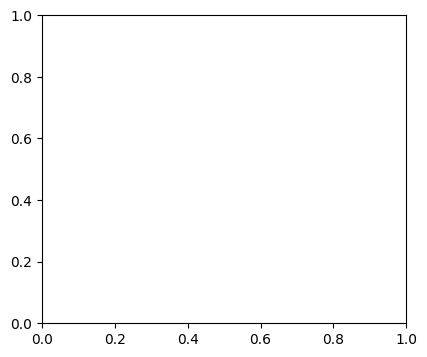

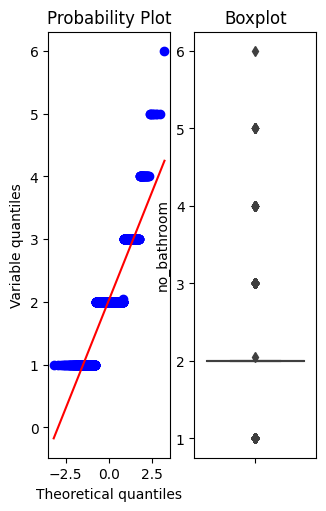

******* price *******


C:\Users\ANIKET RAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ANIKET RAY\AppData\Local\Temp\ipykernel_21500\1989572192.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


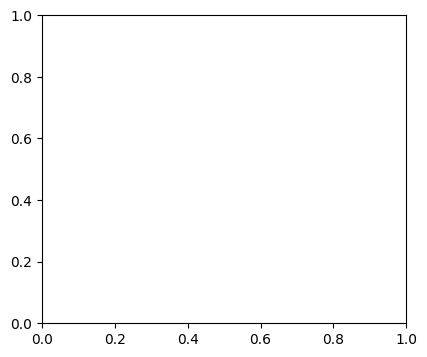

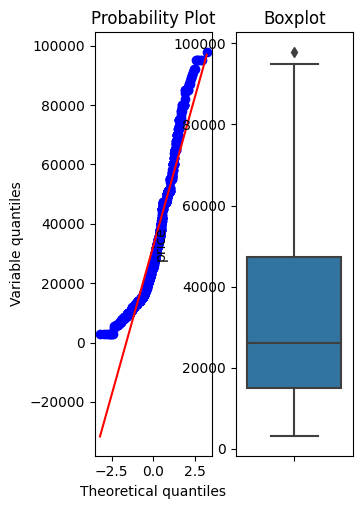

In [142]:
num_var=['size','area','no_bathroom','price']

for var in num_var:
    print("******* {} *******".format(var))
    diagnostic_plots(df4, var)
    
    # here we observe outliers using histogram, qq plot and boxplot
    

    # we can observe that there are many outliers present in area and no_bathroom features

In [143]:
# here we consider 1 BHK size required min 350 sqft area
df4[df4['area']/df4['size']<350].head()

# here we found outliers

,seller_type,size,type_of_house,location,city,price,area,status,no_bathroom
5,VERIFIED OWNER,1,Studio Apartment,Ville Parle East,Mumbai,17000.0,200,Semi-Furnished,1.0
7,VERIFIED OWNER,2,Apartment,Nilje Gaon,Mumbai,9000.0,634,Unfurnished,2.0
15,VERIFIED OWNER,1,Studio Apartment,Worli,Mumbai,20000.0,260,Furnished,1.0
16,VERIFIED OWNER,1,Studio Apartment,Vikroli East,Mumbai,14500.0,300,Unfurnished,1.0
53,AGENT,2,Apartment,Panvel,Mumbai,15000.0,500,Unfurnished,1.0


In [144]:
# if 1 BHK area is < 350 then we are going to remove them
df5=df4[~(df4['area']/df4['size']<350)]
df5.shape

(942, 9)

In [145]:
# if no_bathroom have value more than size+2, we are going to remove them

df6=df5[df5['no_bathroom']<df5['size']+2]
df6.shape

(939, 9)

3

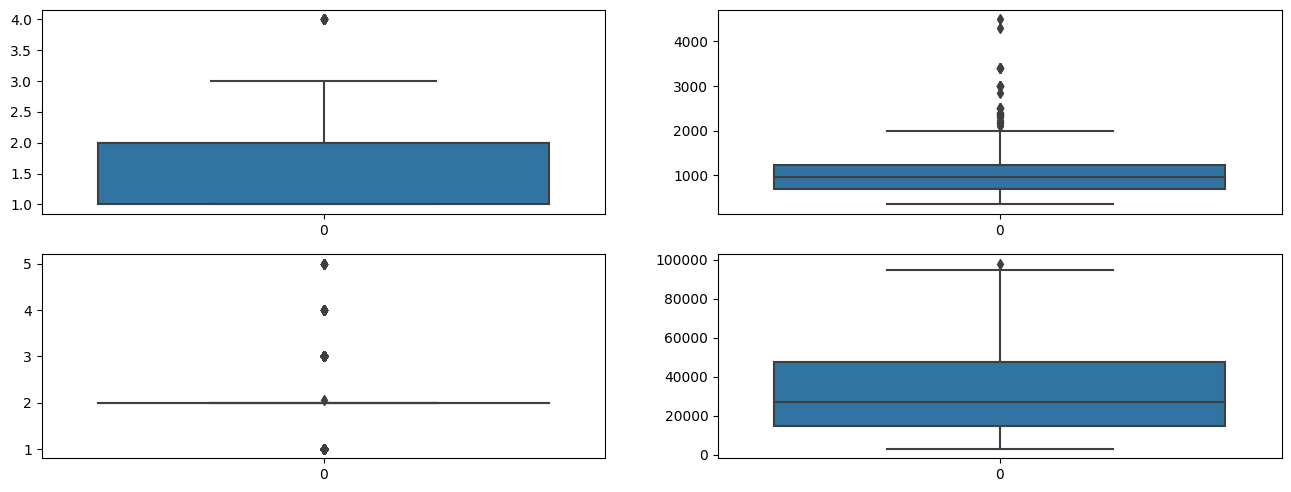

In [146]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df6[var])
3 # we observe that we have removed outliers at large extent

In [147]:
df6.head(10)

,seller_type,size,type_of_house,location,city,price,area,status,no_bathroom
0,BUILDER,2,Apartment,Ulwe,Mumbai,17000.000000,1180,Unfurnished,2.0
1,BUILDER,3,Apartment,Ulwe,Mumbai,22000.000000,1720,Unfurnished,3.0
2,BUILDER,2,Apartment,Ulwe,Mumbai,12500.000000,1150,Unfurnished,2.0
3,VERIFIED OWNER,2,Apartment,Chembur,Mumbai,55000.000000,1050,Semi-Furnished,2.0
4,VERIFIED OWNER,2,Apartment,Mira Road East,Mumbai,18500.000000,1165,Semi-Furnished,2.0
6,VERIFIED OWNER,2,Apartment,Kandivali West,Mumbai,28500.000000,750,Unfurnished,2.0
8,VERIFIED OWNER,2,Apartment,Ghatkopar West,Mumbai,35000.000000,1089,Unfurnished,2.0
9,VERIFIED OWNER,3,Apartment,Fort,Mumbai,47357.007692,1450,Furnished,3.0
10,VERIFIED OWNER,1,Apartment,Shil Phata,Mumbai,18500.000000,680,Furnished,1.0
11,VERIFIED OWNER,1,Apartment,Neral,Mumbai,5500.000000,490,Semi-Furnished,2.0


### Categorical Variable Encoding

In [148]:
# using the get_dummies function in pandas to perform one-hot encoding on 
# the specified categorical columns in the DataFrame df6.
df7= pd.get_dummies(df6,drop_first=True, columns=['seller_type','type_of_house','location','status','city'])
df7.shape

(939, 94)

In [149]:
df7.head()

,size,price,area,no_bathroom,seller_type_BUILDER,seller_type_VERIFIED OWNER,type_of_house_Studio Apartment,location_Agripada,location_Airoli,location_Ambernath West,...,location_Vasai West,location_Vashi,location_Vikhroli,location_Virar,location_Virar West,location_Wadala,location_Worli,location_kasaradavali thane west,status_Semi-Furnished,status_Unfurnished
0,2,17000.0,1180,2.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,3,22000.0,1720,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2,12500.0,1150,2.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2,55000.0,1050,2.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2,18500.0,1165,2.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


###### we can see that in ['location','seller_type','type_of_house','status']  contains multiple classes and if we convert them into OHE so it increases the sizee of DF so try to use those classes which are frequently present in the cat var

### Working on <<<< seller_type_ >>>> feature

In [150]:
df6['seller_type'].value_counts()

seller_type
AGENT             899
VERIFIED OWNER     37
BUILDER             3
Name: count, dtype: int64

In [151]:
df8=df6.copy()

# apply Ohe-hot encoding on'area_type' feature
for cat_var in ['AGENT','VERIFIED OWNER']:
    df8['seller_type'+cat_var]=np.where(df8['seller_type']==cat_var,1,0)
df8.shape

(939, 11)

In [152]:
df8.head()

,seller_type,size,type_of_house,location,city,price,area,status,no_bathroom,seller_typeAGENT,seller_typeVERIFIED OWNER
0,BUILDER,2,Apartment,Ulwe,Mumbai,17000.0,1180,Unfurnished,2.0,0,0
1,BUILDER,3,Apartment,Ulwe,Mumbai,22000.0,1720,Unfurnished,3.0,0,0
2,BUILDER,2,Apartment,Ulwe,Mumbai,12500.0,1150,Unfurnished,2.0,0,0
3,VERIFIED OWNER,2,Apartment,Chembur,Mumbai,55000.0,1050,Semi-Furnished,2.0,0,1
4,VERIFIED OWNER,2,Apartment,Mira Road East,Mumbai,18500.0,1165,Semi-Furnished,2.0,0,1


### Working on <<<< type_of_house >>>> feature

In [153]:
df8['type_of_house'].value_counts()

type_of_house
Apartment           918
Studio Apartment     21
Name: count, dtype: int64

In [154]:
# apply Ohe-hot encoding on'type_of_house' feature
for cat_var in ['Apartment','Studio Apartment']:
    df8['type_of_house'+cat_var]=np.where(df8['type_of_house']==cat_var,1,0)
df8.shape

(939, 13)

In [155]:
df8.head()

,seller_type,size,type_of_house,location,city,price,area,status,no_bathroom,seller_typeAGENT,seller_typeVERIFIED OWNER,type_of_houseApartment,type_of_houseStudio Apartment
0,BUILDER,2,Apartment,Ulwe,Mumbai,17000.0,1180,Unfurnished,2.0,0,0,1,0
1,BUILDER,3,Apartment,Ulwe,Mumbai,22000.0,1720,Unfurnished,3.0,0,0,1,0
2,BUILDER,2,Apartment,Ulwe,Mumbai,12500.0,1150,Unfurnished,2.0,0,0,1,0
3,VERIFIED OWNER,2,Apartment,Chembur,Mumbai,55000.0,1050,Semi-Furnished,2.0,0,1,1,0
4,VERIFIED OWNER,2,Apartment,Mira Road East,Mumbai,18500.0,1165,Semi-Furnished,2.0,0,1,1,0


### Working on <<<< location >>>> feature

In [156]:
location_value_count = df8['location'].value_counts()
location_value_count
# we can see that we have many locations but some location have count value very less

location
Thane West           152
Panvel               120
Kalyan West           51
Kharghar              45
Wadala                33
                    ... 
Madh                   1
Koper Khairane         1
Naigaon East           1
Ambernath West         1
Sector 21 Kamothe      1
Name: count, Length: 86, dtype: int64

In [157]:
# we will get the location whose count values are freater than 10
location_gert_10 = location_value_count[location_value_count>=10].index
location_gert_10

Index(['Thane West', 'Panvel', 'Kalyan West', 'Kharghar', 'Wadala',
       'Kalamboli', 'Andheri East', 'Kanjurmarg', 'Vikhroli', 'Ulwe',
       'Santacruz East', 'Chembur', 'Kandivali East', 'Kamothe', 'Seawoods',
       'Andheri West', 'Powai', 'Bandra West', 'Mira Road East', 'Dombivali',
       'Lower Parel', 'Worli', 'Dombivali East', 'Colaba'],
      dtype='object', name='location')

In [158]:
# location count is greater than 9 then we create a column of that feature
# then if this location present in location feature then set value 1 else 0 (ohe hot encoding)
df9= df8.copy()
for cat_var in location_gert_10:
    df9['location'+cat_var]=np.where(df9['location']==cat_var,1,0)
df9.shape

(939, 37)

In [159]:
df9.head()

,seller_type,size,type_of_house,location,city,price,area,status,no_bathroom,seller_typeAGENT,...,locationSeawoods,locationAndheri West,locationPowai,locationBandra West,locationMira Road East,locationDombivali,locationLower Parel,locationWorli,locationDombivali East,locationColaba
0,BUILDER,2,Apartment,Ulwe,Mumbai,17000.0,1180,Unfurnished,2.0,0,...,0,0,0,0,0,0,0,0,0,0
1,BUILDER,3,Apartment,Ulwe,Mumbai,22000.0,1720,Unfurnished,3.0,0,...,0,0,0,0,0,0,0,0,0,0
2,BUILDER,2,Apartment,Ulwe,Mumbai,12500.0,1150,Unfurnished,2.0,0,...,0,0,0,0,0,0,0,0,0,0
3,VERIFIED OWNER,2,Apartment,Chembur,Mumbai,55000.0,1050,Semi-Furnished,2.0,0,...,0,0,0,0,0,0,0,0,0,0
4,VERIFIED OWNER,2,Apartment,Mira Road East,Mumbai,18500.0,1165,Semi-Furnished,2.0,0,...,0,0,0,0,1,0,0,0,0,0


### working on <<<< status >>>> feature




In [160]:
df9['status'].value_counts()

status
Semi-Furnished    426
Unfurnished       352
Furnished         161
Name: count, dtype: int64

In [161]:
for cat_var in ['Semi-Furnished','Unfurnished','Furnished']:
    df9['status'+cat_var]=np.where(df9['status']==cat_var,1,0)
df9.shape

(939, 40)

In [162]:
df9.head()

,seller_type,size,type_of_house,location,city,price,area,status,no_bathroom,seller_typeAGENT,...,locationBandra West,locationMira Road East,locationDombivali,locationLower Parel,locationWorli,locationDombivali East,locationColaba,statusSemi-Furnished,statusUnfurnished,statusFurnished
0,BUILDER,2,Apartment,Ulwe,Mumbai,17000.0,1180,Unfurnished,2.0,0,...,0,0,0,0,0,0,0,0,1,0
1,BUILDER,3,Apartment,Ulwe,Mumbai,22000.0,1720,Unfurnished,3.0,0,...,0,0,0,0,0,0,0,0,1,0
2,BUILDER,2,Apartment,Ulwe,Mumbai,12500.0,1150,Unfurnished,2.0,0,...,0,0,0,0,0,0,0,0,1,0
3,VERIFIED OWNER,2,Apartment,Chembur,Mumbai,55000.0,1050,Semi-Furnished,2.0,0,...,0,0,0,0,0,0,0,1,0,0
4,VERIFIED OWNER,2,Apartment,Mira Road East,Mumbai,18500.0,1165,Semi-Furnished,2.0,0,...,0,1,0,0,0,0,0,1,0,0


### Drop Categorical Variable

In [163]:
# we also dropped city column as only Mumbai is there so wont affect the prediction
df10=df9.drop(['location','seller_type','type_of_house','status','city'],axis=1)
df10.shape

(939, 35)

In [164]:
df10.head()

,size,price,area,no_bathroom,seller_typeAGENT,seller_typeVERIFIED OWNER,type_of_houseApartment,type_of_houseStudio Apartment,locationThane West,locationPanvel,...,locationBandra West,locationMira Road East,locationDombivali,locationLower Parel,locationWorli,locationDombivali East,locationColaba,statusSemi-Furnished,statusUnfurnished,statusFurnished
0,2,17000.0,1180,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,22000.0,1720,3.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,12500.0,1150,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,55000.0,1050,2.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,18500.0,1165,2.0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [165]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   size                           939 non-null    int64  
 1   price                          939 non-null    float64
 2   area                           939 non-null    int64  
 3   no_bathroom                    939 non-null    float64
 4   seller_typeAGENT               939 non-null    int32  
 5   seller_typeVERIFIED OWNER      939 non-null    int32  
 6   type_of_houseApartment         939 non-null    int32  
 7   type_of_houseStudio Apartment  939 non-null    int32  
 8   locationThane West             939 non-null    int32  
 9   locationPanvel                 939 non-null    int32  
 10  locationKalyan West            939 non-null    int32  
 11  locationKharghar               939 non-null    int32  
 12  locationWadala                 939 non-null    int32  


In [166]:
df10.to_csv('ohe_data_reduce_cat_class.csv', index=False)

### ML Model Developed on different algorithms


#### processed dataset


In [167]:
df10.head()

,size,price,area,no_bathroom,seller_typeAGENT,seller_typeVERIFIED OWNER,type_of_houseApartment,type_of_houseStudio Apartment,locationThane West,locationPanvel,...,locationBandra West,locationMira Road East,locationDombivali,locationLower Parel,locationWorli,locationDombivali East,locationColaba,statusSemi-Furnished,statusUnfurnished,statusFurnished
0,2,17000.0,1180,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,22000.0,1720,3.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,12500.0,1150,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,55000.0,1050,2.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,18500.0,1165,2.0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### Split Dataset in Train and test


In [169]:
X= df10.drop("price", axis=1)
y=df10['price']
print('Shape of X= ', X.shape)
print('Shape of y= ', y.shape)


Shape of X=  (939, 34)
Shape of y=  (939,)


In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=51)
print('Shape of X_train= ', X_train.shape)
print('Shape of X_test= ', X_test.shape)
print('Shape of y_train= ', y_train.shape)
print('Shape of y_test= ', X_test.shape)


Shape of X_train=  (751, 34)
Shape of X_test=  (188, 34)
Shape of y_train=  (751,)
Shape of y_test=  (188, 34)


### Feature Scaling

In [171]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test= sc.transform(X_test)

### Machine Learning Model training

### Linear Regression

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr= LinearRegression()
lr_lasso= Lasso()
lr_ridge= Ridge()

In [174]:
# creating function to get the mean_squared_error
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

In [175]:
#Linear
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # with all num var 0.6233479403008555
lr_rmse= rmse(y_test, lr.predict(X_test))
lr_score,lr_rmse

(0.6233479403008555, 12533.616109826015)

In [176]:
#Lasso
lr_lasso.fit(X_train, y_train)
lr_lasso_score = lr_lasso.score(X_test, y_test) # with all num var 0.6233322525561815
lr_lasso_rmse= rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score,lr_lasso_rmse

(0.6233322525561815, 12533.877122764852)

In [177]:
#Ridge
lr_ridge.fit(X_train, y_train)
lr_ridge_score = lr_ridge.score(X_test, y_test) # with all num var 0.6235074346180465
lr_ridge_rmse= rmse(y_test, lr_ridge.predict(X_test))
lr_ridge_score,lr_ridge_rmse

(0.6235074346180465, 12530.962132286975)

In [178]:
# overall we can see that linear regression model is not able to give that much
# good accuracy

### Support Vector Machine


In [179]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train, y_train)
svr_score = svr.score(X_test, y_test) # with all num var -0.09455931379784888
svr_rmse= rmse(y_test, svr.predict(X_test))
svr_score,svr_rmse

# we can say that by SVM we get a really bad accuracy


(-0.09455931379784888, 21366.129960937014)

### Random Forest Regressor

In [207]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_score = rfr.score(X_test, y_test) # with all num var 0.760682283801976
rfr_rmse= rmse(y_test, rfr.predict(X_test))
rfr_score,rfr_rmse

# We can say that Random Forest Regressor is giving a pretty good accuracy

(0.760682283801976, 9990.647594786818)

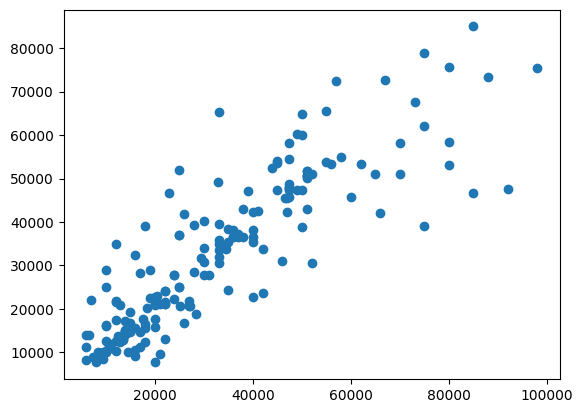

In [208]:
plt.scatter(y_test,rfr.predict(X_test))

C:\Users\ANIKET RAY\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


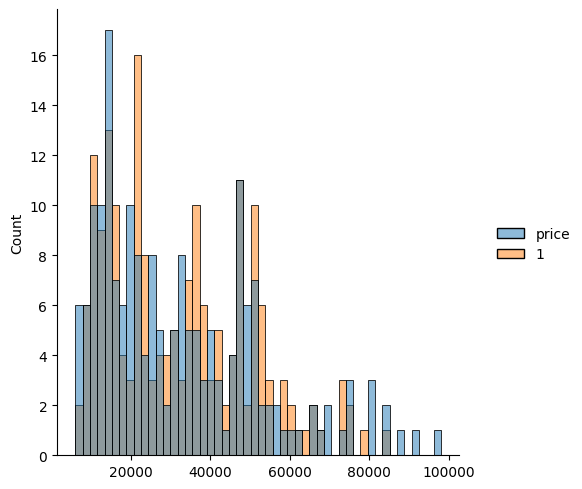

In [209]:
sns.displot((y_test,rfr.predict(X_test)),bins=50)

### XGBoost


In [211]:
import xgboost
xgb_reg= xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg_score = xgb_reg.score(X_test, y_test) # with all num var 0.7076982065308773
xgb_reg_rmse= rmse(y_test, xgb_reg.predict(X_test))
xgb_reg_score,xgb_reg_rmse

# We can say that XGBoost is decent

(0.7076982065308773, 11041.344368785665)

In [212]:
## lets make the output from all the models at one place
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))

## clearly we can see that Random Forest is giving the best accuracy and minimum rmse

                    Model     Score          RMSE
0       Linear Regression  0.623348  12533.616110
1                   Lasso  0.623332  12533.877123
2  Support Vector Machine -0.094559  21366.129961
3           Random Forest  0.760682   9990.647595
4                 XGBoost  0.707698  11041.344369


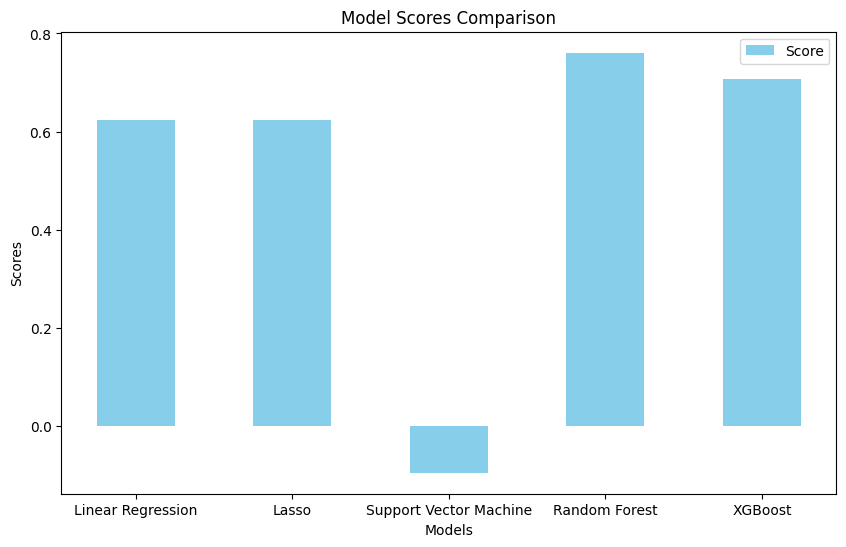

In [213]:
df = pd.DataFrame([
    {'Model': 'Linear Regression', 'Score': lr_score},
    {'Model': 'Lasso', 'Score': lr_lasso_score},
    {'Model': 'Support Vector Machine', 'Score': svr_score},
    {'Model': 'Random Forest', 'Score': rfr_score},
    {'Model': 'XGBoost', 'Score': xgb_reg_score}
], columns=['Model', 'Score'])

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
index = range(len(df))
bar_width = 0.5

# Bar graph for 'Score' only
bar1 = ax.bar(index, df['Score'], bar_width, label='Score', color='skyblue')

# Adding labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Scores Comparison')
ax.set_xticks(index)
ax.set_xticklabels(df['Model'])
ax.legend()

# Display the plot
plt.show()
